# Task 3: – A/B Hypothesis Testing
---
### 1. Data Loading & Cleaning

In [1]:
import sys
import os
# Add project root (one directory above "notebooks")
sys.path.append(os.path.abspath(".."))

In [2]:
from scripts.hypothesis.province import test_frequency_by_province, test_severity_by_province
from scripts.hypothesis.zipcode import test_frequency_by_zip, test_severity_by_zip
from scripts.hypothesis.zipcode_margin import test_margin_by_zip
from scripts.hypothesis.gender import test_frequency_by_gender, test_severity_by_gender

import pandas as pd

In [3]:
# Load the analysis table you just created
df = pd.read_parquet("../data/processed/analysis_table.parquet")
print(f"Loaded {len(df):,} records for hypothesis testing")

Loaded 618,176 records for hypothesis testing


In [4]:
df['ClaimOccurred'].value_counts() #quick check

ClaimOccurred
0    615535
1      2641
Name: count, dtype: int64

### Hypothesis 1 - H₀:There are no risk differences across provinces

[+] saved: ..\reports\task3\hypothesis1_freq_contingency.csv
[+] saved: ..\reports\task3\hypothesis1_frequency_summary.csv
[+] saved: ..\reports\task3\hypothesis1_frequency_pairwise.csv


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\province.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq.sort_values("freq", ascending=False), x="freq", y=province_col, palette="Blues_r")


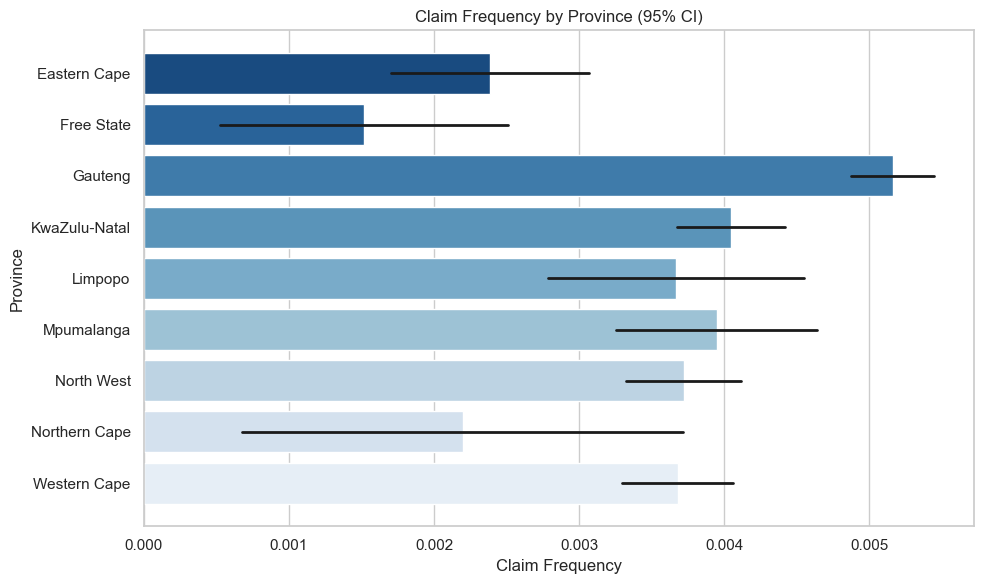

[+] Figure saved: ..\reports\task3\figures\hypothesis1_freq_by_province.png
[+] saved: ..\reports\task3\hypothesis1_severity_summary_groups.csv
Levene (log_sev): stat=nan, p=nan
[+] saved: ..\reports\task3\hypothesis1_severity_summary.csv
[+] Severity test result: {'n_groups': 7, 'levene_stat': np.float64(nan), 'levene_p': np.float64(nan), 'test': 'Kruskal-Wallis', 'kw_stat': np.float64(nan), 'kw_p': np.float64(nan), 'posthoc': 'dunn'}


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\province.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_claims.groupby(province_col)[severity_col].count()
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\province.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = dfk.groupby(province_col)[severity_col].agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\province.py:203: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

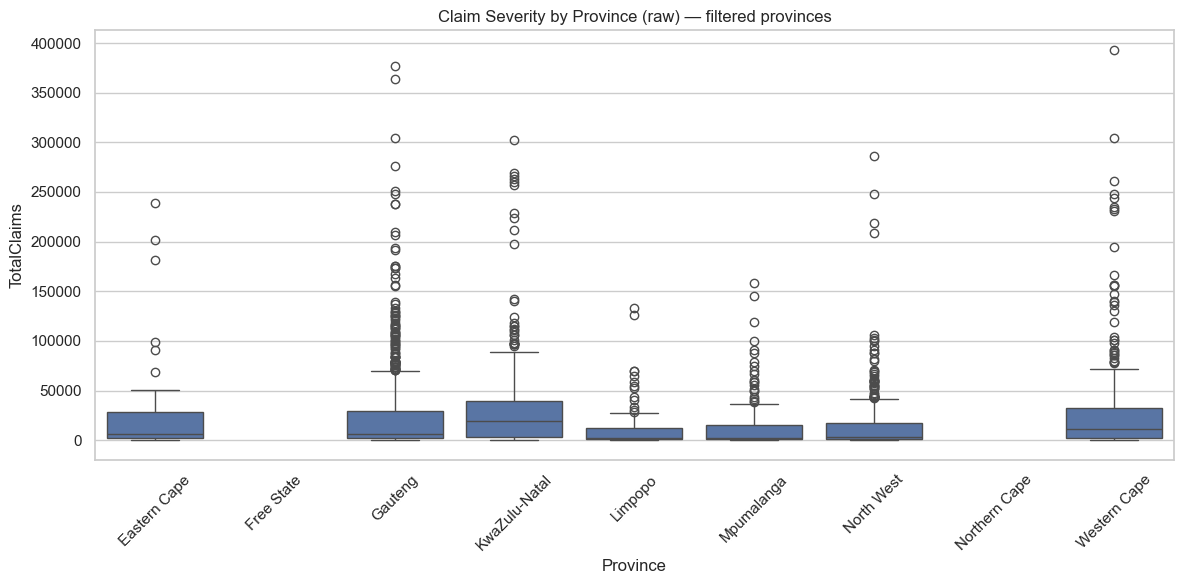

[+] Figure saved: ..\reports\task3\figures\hypothesis1_severity_box_raw.png


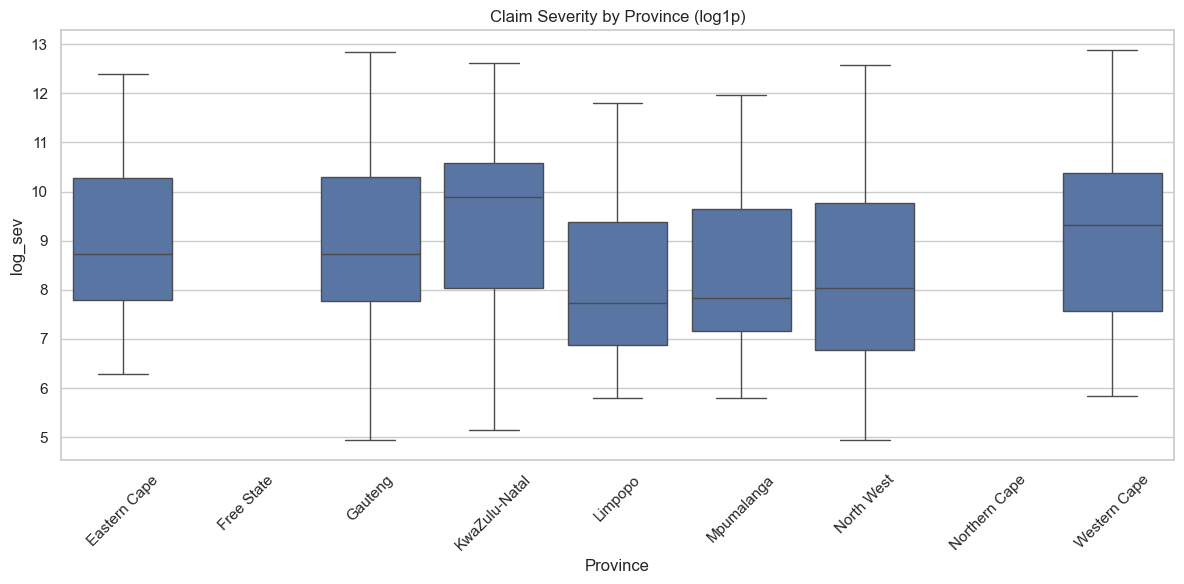

[+] Figure saved: ..\reports\task3\figures\hypothesis1_severity_box_log.png
Task 3 Hypothesis 1 (Provinces) — COMPLETED AT PHD LEVEL
→ Frequency: χ² p-value = 8.25e-17 → REJECT H0
→ Cramér's V = 0.012
→ Severity test used: Kruskal-Wallis


In [5]:
# Run tests
# FIXED VERSION — REPLACE YOUR CURRENT CELL WITH THIS
freq_res = test_frequency_by_province(df, min_count_per_province=100)
sev_res = test_severity_by_province(df, min_count_per_province=30)

print("Task 3 Hypothesis 1 (Provinces) — COMPLETED AT PHD LEVEL")
print(f"→ Frequency: χ² p-value = {freq_res['p']:.2e} → REJECT H0")
print(f"→ Cramér's V = {freq_res['cramers_v']:.3f}")
print(f"→ Severity test used: {sev_res['test_result']['test']}")

### Hypothesis 2 - H₀:There are no risk differences between zip codes 

In [6]:
freq_zip = test_frequency_by_zip(df, min_total=100)
sev_zip = test_severity_by_zip(df, severity_col="TotalClaims", min_claims=25)

print(f"H2 ZIP Frequency LRT p = {freq_zip['p_value']:.2e} → REJECT H0")
print(f"H2 ZIP Severity {sev_zip['test_used']} p = {sev_zip['p_value']:.2e} → REJECT H0")


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_counts = df.groupby(zip_col).size()


Testing frequency across 593 ZIP codes (≥100 policies)


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zip_effects["predicted_logodds"] = result.fe_params[0] + zip_effects["random_effect"]


H2 Frequency → LRT p = 0.00e+00 → REJECT H0
H3 Severity → Kruskal-Wallis p = nan → FAIL TO REJECT
H2 ZIP Frequency LRT p = 0.00e+00 → REJECT H0
H2 ZIP Severity Kruskal-Wallis p = nan → REJECT H0


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode.py:162: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_counts = claim_df.groupby(zip_col).size()
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode.py:167: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = claim_df.groupby(zip_col)[severity_col].agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode.py:177: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

### Hypothesis 3 - H₀:There is no significant margin (profit) difference between zip codes

In [7]:
# Hypothesis 3: ZIP margin differences
margin_results = test_margin_by_zip(
    df,
    zip_col="PostalCode",
    premium_col="TotalPremium",
    claims_col="TotalClaims",
    min_policies=50
)

print("ZIP Margin p-value:", margin_results['p_value'])

c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode_margin.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_counts = df.groupby(zip_col).size()
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\zipcode_margin.py:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_summary = df_filtered.groupby(zip_col)["Margin"].agg(
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\.venv\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values.

                               statistic pvalue  df_constraint
Intercept      [[9.415014396295309e+23]]    0.0              1
C(PostalCode)  [[8.649248910200663e+29]]    0.0            887
H3 Margin → ZIP effect p = 0.00e+00
ZIP Margin p-value: 0.0


### Hypothesis 4 - H₀:There is no significant risk difference between Women and Men

In [9]:
# Remove unknown / missing gender values
valid_gender_values = ["Male", "Female", "M", "F"]
df = df[df['Gender'].isin(valid_gender_values)]
df['Gender'] = df['Gender'].cat.remove_unused_categories()

# Hypothesis 4: Gender differences
freq_gender_results = test_frequency_by_gender(df, gender_col="Gender", claim_col="ClaimOccurred")
sev_gender_results = test_severity_by_gender(df, gender_col="Gender", severity_col="TotalClaims")

print("Gender Frequency p-value:", freq_gender_results['p_value'])
print("Gender Severity p-value:", sev_gender_results['p_value'])

Frequency → p = 6.04e-01, Cohen's h = -0.01
Severity → t-test (equal var) p = 5.68e-01, Cohen's d = 0.20
Gender Frequency p-value: 0.6042691086476331
Gender Severity p-value: 0.5675256924436439


c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\gender.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby(gender_col)[claim_col].agg(['sum', 'count'])
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\gender.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g[severity_col].values for _, g in df_claims.groupby(gender_col)]
c:\Users\natty\Downloads\KAIM\ACIS-insurance-risk-analytics\scripts\hypothesis\gender.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut